## Mobile Price Prediction



### Problem Statement

Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is.

In this data:

#### id:ID
#### battery_power:Total energy a battery can store in one time measured in mAh
#### blue:Has bluetooth or not
#### clock_speed:speed at which microprocessor executes instructions
#### dual_sim:Has dual sim support or not
#### fc:Front Camera mega pixels
#### four_g:Has 4G or not
#### int_memory:Internal Memory in Gigabytes
#### m_dep:Mobile Depth in cm
#### mobile_wt:Weight of mobile phone
#### n_cores:Number of cores of processor
#### pc:Primary Camera mega pixels
#### px_height:Pixel Resolution Height
#### px_width:Pixel Resolution Width
#### ram:Random Access Memory in Megabytes
#### sc_h:Screen Height of mobile in cm
#### sc_w:Screen Width of mobile in cm
#### talk_time:longest time that a single battery charge will last when you are
#### three_g:Has 3G or not
#### touch_screen:Has touch screen or not
#### wifi:Has wifi or not




#### Let us start our project by importing some of the important libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Let us read our dataset which is in the form of .csv

In [65]:
df = pd.read_csv("C:/Users/Daksha/Desktop/Mobile Prediction Train.csv")

In [66]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#### Let us check out all the information we can gain from the dataset

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


#### Let us check for any existing null values

In [68]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### Let us check for any outliers

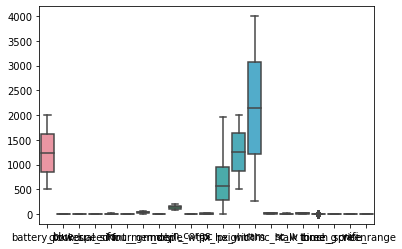

In [69]:
sns.boxplot(data=df, whis=3)

#### We dont see any major outliers so we can continue with this dataset
#### The dataset is readily scaled so it doesnt need any scaling

#### Next we will check unique values present in our target variable price_range

In [70]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

### Now we will do some Robust Scaling which will help us in dealing with outliers

In [71]:
from sklearn.preprocessing import RobustScaler

In [72]:
scaler = RobustScaler()

In [74]:
scaled_features = scaler.fit_transform(df.drop('price_range', axis=1))

In [75]:
scaled_features

array([[-0.50294695,  0.        ,  0.46666667, ..., -1.        ,
        -1.        ,  0.        ],
       [-0.26850033,  1.        , -0.66666667, ...,  0.        ,
         0.        , -1.        ],
       [-0.86836935,  1.        , -0.66666667, ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 0.89718402,  0.        , -0.4       , ...,  0.        ,
         0.        , -1.        ],
       [ 0.3745907 ,  0.        , -0.4       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.93778651,  1.        ,  0.33333333, ...,  0.        ,
         0.        ,  0.        ]])

#### Let us define our dependent or independent variables

In [76]:
Y = df['price_range']

### Let us now use train_test_split 

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_features,Y,test_size=0.20, random_state=0)

### First we will use K Nearest Neighbors Classifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)

#### Let us fit our X_train and Y_train to our model so it can learn from the data

In [79]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

#### Let us check the accuracy score of our model with the test data

In [80]:
knn.score(X_test,Y_test)

0.6575

#### We get an accuracy of 65.75% which is quite good 



### Next we will use Logistic Regression

#### We follow the same steps as the above to check which classifier gives us the highest accuracy

#### We will use the multi_class as multinomial since there are more than one target variables

#### We will use the solving method as newton-cg 

In [81]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', max_iter=2000)

In [82]:
log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
log.score(X_test,Y_test)

0.955

#### We got an accuracy of 95.50% which is really good



### Next we will use NaiveBayes

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
bayes = GaussianNB()

In [86]:
bayes.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
bayes.score(X_test,Y_test)

0.835

###  WE GOT ACCURACY OF 83.5%

### Let us use RandomForest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
forest = RandomForestClassifier(criterion='gini',n_estimators=1000)

In [104]:
forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
forest.score(X_test,Y_test)

0.875

### A  good accuracy of 87.5%


## We got best model as Logistic Regression with 95.5% accuracy

### Let us use it on our test dataset. Now we must load the test dataset using read_csv function

In [106]:
df1 = pd.read_csv("C:/Users/Daksha/Desktop/Mobile Prediction Test.csv")

In [107]:
df1.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


#### Let us drop the id column which is extra in our dataset

In [108]:
df1 = df1.drop('id', axis=1)

### Let us do Robust Scaling for this dataset just like the above to fit in our model

In [110]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df1 = scaler.fit_transform(df1)

#### Let us use our best model i.e. our KNearest Neighbor Classifier to do the predictions

In [111]:
log.predict(df1)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 1, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

### We have successfully predicted the class to which a particular data belongs